In [ ]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import numpy

In [3]:
import torch
print(torch.__version__) #2.6.0+cu124

2.6.0+cu124


In [16]:
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')
print(torch.cuda.is_available())
print("device ", device)

True
device  cuda


In [5]:
'''
TODO: include in application for MLI programme.
personal contextual information
I have built and trained convlutional networks in the past using keras + tensorflow.
the inital stage of the project for me is more about re-familiarising myself with fundamentals and adapting to a new framework for underlying principles.
'''

# Define a transform to convert the data to tensor and normalize it
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the training dataset with normalization
train_dataset = datasets.MNIST(root='data', train=True, download=True, transform=transform)

# Load the test dataset with normalization
test_dataset = datasets.MNIST(root='data', train=False, download=True, transform=transform)


# Define batch size
batch_size = 64

# Create data loader for the training dataset
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Create data loader for the test dataset
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


In [62]:
# Function to visualize images
def show_images(images, labels):
    fig, axes = plt.subplots(len(images)//5, 5, figsize=(10, 2))
    for img, label, ax in zip(images, labels, axes):
        ax.imshow(img.squeeze(), cmap='gray')
        ax.set_title(f'Value: {label}')
        ax.axis('off')
    plt.show()



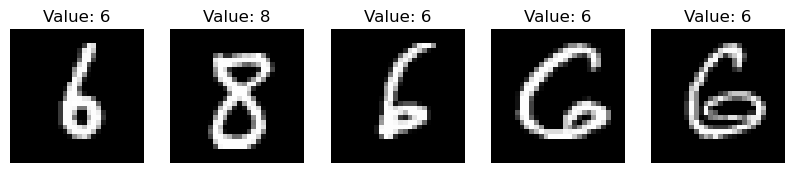

In [57]:
# Get a batch of images from the training data loader
data_iter = iter(train_loader)
pictures, true_values = next(data_iter)

# Display the first 5 images
show_images(pictures[:5], true_values[:5])

In [8]:
'''
refresher on cnn fundamentals [https://www.youtube.com/watch?v=pDdP0TFzsoQ]
building a cnn in pytorch.
convolutional layers, pooling layers, rectified linear unit (ReLU) layers, and fully connected layer
'''

'\nrefresher on cnn fundamentals [https://www.youtube.com/watch?v=pDdP0TFzsoQ]\nbuilding a cnn in pytorch.\nconvolutional layers, pooling layers, rectified linear unit (ReLU) layers, and fully connected layer\n'

In [9]:
#defining variables that will be used to build model and specifying processor for training
classifications = ('0','1','2','3','4','5','6','7','8','9')
batch_size = 64 #redeclared batch size so I can alter it for lighter load on training.
# training_epochs = 100 #declared in 'training' section of file. here for reference
learn_rate = 0.001

#I have cuda-12.4 enabled GPU
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

In [10]:
print(torch.version.cuda)  # Should return a version number, not None
print(torch.backends.cudnn.enabled)

12.4
True


In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
#building conv model 
#MNIST dataset contains single-channel image -> Input 28*28
# ( (Conv -> ReLU)*2 -> Pooling )*3 -> Fully Connected 
class ConvNet(nn.ModuleList):

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)
        self.softmax = nn.LogSoftmax(dim=1)
    
    def forward(self, inputs):
        inputs = inputs.view(-1, 28 * 28)  # Flatten the input
        inputs = self.fc1(inputs)
        inputs = self.relu(inputs)
        inputs = self.fc2(inputs)
        return self.softmax(inputs)


model = ConvNet().to(device) #instance of class passed to GPU/CPU
# model = ConvNet()
criterion = nn.CrossEntropyLoss() #CEL for classification model
optimiser = optim.SGD(params=model.parameters(), lr=learn_rate)    

In [ ]:
training_epochs = 100

for epoch in range(training_epochs):
    #iterate over train set and pass into model
    # best_model_state = deepcopy(model.state_dict())  
    for i, (image, label) in enumerate(train_loader):
        # Get a batch of images from the training data loader
        images = image.to(device)
        labels = label.to(device)

        outputs = model(images).to(device)
        loss = criterion(outputs, labels)
        
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        

In [13]:
torch.save(model.state_dict(), "./saved_models/mid_train_model")

In [15]:
correct = 0
total = 0
with torch.no_grad():
    for i, (images, labels) in enumerate(test_loader):
        images, labels = images.to(device), labels.to(device) 
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    # show_predictions(images.to("cpu"),outputs.to("cpu"),labels.to("cpu"))

accuracy = 100 * correct / total
print(f'Accuracy on test set: {accuracy:.3f}%')


Accuracy on test set: 94.300%


In [ ]:
# pictures, true_values = next(data_iter)

In [ ]:
probs = torch.nn.functional.softmax(model(pictures[:5].to(device)), dim=1)

for i in range(0,len(pictures[:5])):
    conf, classes = torch.max(probs, 1) #1/0 for last arg
    print(f"(pred: {classifications[classes[i].item()]}, conf: {conf[i].item():.3f} , true: {true_values[i]})")


(pred: 2, conf: 0.969 , true: 2)
(pred: 2, conf: 1.000 , true: 2)
(pred: 9, conf: 0.850 , true: 9)
(pred: 1, conf: 0.762 , true: 1)
(pred: 3, conf: 0.989 , true: 3)


In [79]:
#TODO: Plot some example test data with predictions and ground truths.